## QB Data Analysis

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
pd.options.display.max_rows = 500
qb_file = "qb_games_more_10.csv"

In [2]:
qb_data = pd.read_csv(qb_file)
qb_data.head()

,Unnamed: 0,name,id,Year,Date,G.,Age,Tm,X,Opp,Result,GS,Cmp,Att,Cmp.,Yds,TD,Int,Rate,Sk,Yds.1,Y.A,AY.A,Att.1,Yds.2,Y.A.1,TD.1,TD.2,Pts,Fmb,FF,FR,Yds.3,TD.3
0,31,A.J. Feeley,FeelA.00,2001,2002-01-06,16,24.235,PHI,@,TAM,W 17-13,NaN,10.0,14.0,71.43,143.0,2.0,1.0,114.0,0.0,0.0,10.21,9.86,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,33,A.J. Feeley,FeelA.00,2002,2002-12-01,12,25.199,PHI,NaN,STL,W 10-3,*,14.0,30.0,46.67,181.0,0.0,0.0,66.1,3.0,24.0,6.03,6.03,2.0,3.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34,A.J. Feeley,FeelA.00,2002,2002-12-08,13,25.206,PHI,@,SEA,W 27-20,*,21.0,35.0,60.00,190.0,2.0,1.0,81.8,0.0,0.0,5.43,5.29,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35,A.J. Feeley,FeelA.00,2002,2002-12-15,14,25.213,PHI,NaN,WAS,W 34-21,*,16.0,28.0,57.14,220.0,2.0,1.0,91.4,2.0,10.0,7.86,7.68,2.0,5.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36,A.J. Feeley,FeelA.00,2002,2002-12-21,15,25.219,PHI,@,DAL,W 27-3,*,19.0,33.0,57.58,253.0,1.0,2.0,66.9,1.0,8.0,7.67,5.55,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Cleaning

In [3]:
# 26951 games included, with 34 columns
qb_data.shape

(26951, 34)

In [4]:
# see which columns have na values
qb_data.isna().any()

Unnamed: 0    False
name          False
id            False
Year          False
Date          False
G.            False
Age           False
Tm            False
X              True
Opp           False
Result        False
GS             True
Cmp            True
Att           False
Cmp.           True
Yds            True
TD             True
Int            True
Rate           True
Sk             True
Yds.1          True
Y.A            True
AY.A           True
Att.1          True
Yds.2          True
Y.A.1          True
TD.1           True
TD.2           True
Pts            True
Fmb            True
FF             True
FR             True
Yds.3          True
TD.3           True
dtype: bool

In [5]:
# replace most NA values with 0
columns_to_set_na_to_0 = ['Cmp','Cmp.','Yds','TD','Int','Rate','Sk','Yds.1','Y.A','AY.A','Att.1','Yds.2','Y.A.1','TD.1','TD.2','Pts','Fmb','FF','FR','Yds.3','TD.3']
qb_data[columns_to_set_na_to_0] = qb_data[columns_to_set_na_to_0].fillna(0)
# make game started a boolean
qb_data['GS'] = qb_data['GS'] == "*"
# get rid of this random column
qb_data = qb_data.drop('Unnamed: 0', axis=1)

In [6]:
# extract a win from the result column with a 1, or a 0 for a loss
qb_data['team_win'] = [1 if "W" in x else 0 for x in qb_data['Result']]
# get a list of games the team won that that QB started
qb_data['start_win'] = [1 if ("W" in qb_data.loc[i,'Result'] and qb_data.loc[i,'GS'] == True) else 0 for i in range(qb_data.shape[0])]

In [7]:
# iterating through the list of QBs to figure out which "game number" of their career each game represents
games_list = []
games_started = []
last_qb = None
for index, row in qb_data.iterrows():
    current_qb = row.id
    if current_qb != last_qb:
        count = 1
        if row['GS'] == True:
            gs_count = 1
        else:
            gs_count = 0
    else:
        count += 1
        if row['GS'] == True:
            gs_count +=1
    games_list.append(count)
    games_started.append(gs_count)
    last_qb = current_qb
qb_data['game_count'] = games_list
qb_data['start_count'] = games_started

In [8]:
qb_data.loc[0:50,['name','GS','game_count','start_count']]

,name,GS,game_count,start_count
0,A.J. Feeley,False,1,0
1,A.J. Feeley,True,2,1
2,A.J. Feeley,True,3,2
3,A.J. Feeley,True,4,3
4,A.J. Feeley,True,5,4
5,A.J. Feeley,True,6,5
6,A.J. Feeley,False,7,5
7,A.J. Feeley,True,8,6
8,A.J. Feeley,True,9,7
9,A.J. Feeley,False,10,7


In [9]:
# get the total number of games a player played and started in their career
qb_total_games = qb_data.groupby(['name','id'])['game_count', 'start_count'].max()
#qb_games_started = qb_data.groupby(['name','id'])['start_count'].max()
qb_total_games.head()

,,game_count,start_count
name,id,,
A.J. Feeley,FeelA.00,23,18
A.J. McCarron,McCaA.00,5,4
Aaron Brooks,BrooAa00,92,91
Aaron Rodgers,RodgAa00,167,164
Adrian Burk,BurkAd00,51,39


In [10]:
# get sum totals for each QB on the following columns
sum_columns =['Cmp', 'Att','Yds','TD','Int','Sk','Fmb','team_win','start_win']
qb_totals = qb_data.groupby(['name', 'id'])[sum_columns].sum()

# join that table with the games started and total games tables
qb_totals = qb_totals.join(qb_total_games)
qb_totals.head()

,,Cmp,Att,Yds,TD,Int,Sk,Fmb,team_win,start_win,game_count,start_count
name,id,,,,,,,,,,,
A.J. Feeley,FeelA.00,416.0,747.0,4553.0,27.0,31.0,42.0,3.0,11,8,23,18
A.J. McCarron,McCaA.00,99.0,156.0,1044.0,7.0,3.0,15.0,4.0,2,2,5,4
Aaron Brooks,BrooAa00,1719.0,3040.0,20822.0,129.0,95.0,239.0,0.0,39,39,92,91
Aaron Rodgers,RodgAa00,3756.0,5805.0,45426.0,364.0,89.0,424.0,70.0,106,106,167,164
Adrian Burk,BurkAd00,473.0,1008.0,6647.0,59.0,79.0,0.0,0.0,18,14,51,39


In [11]:
# add some more columns based on career totals
qb_totals['Cmp.'] = qb_totals['Cmp'] / qb_totals['Att']
qb_totals['Y.A'] = qb_totals['Yds'] / qb_totals['Att']
qb_totals['TD_pct'] = qb_totals['TD'] / qb_totals['Att']
qb_totals['Int_pct'] = qb_totals['Int'] / qb_totals['Att']
# below is the winning percentage for the team in the games that they started
qb_totals['gs_wp'] = (qb_totals['start_win'] / qb_totals['start_count']).fillna(0)
qb_totals['sack_pg'] = (qb_totals['Sk'] / qb_totals['start_count']).fillna(0)

In [12]:
# just looking at qbs with at least 10 starts
qb_10_starts = qb_totals[qb_totals.start_count >= 10]
qb_10_starts.shape
# 346 QBs in our dataset with at least 10 starts

(346, 17)

In [13]:
# Lets sort among the QBs with at least 10 starts in terms of team winning percentage in games they started
qb_10_starts.sort_values('gs_wp', ascending=False)
# Look who's #1!

,,Cmp,Att,Yds,TD,Int,Sk,Fmb,team_win,start_win,game_count,start_count,Cmp.,Y.A,TD_pct,Int_pct,gs_wp,sack_pg
name,id,,,,,,,,,,,,,,,,,
Patrick Mahomes,MahoPa00,232.0,352.00,3185.0,29.0,8.0,14.0,5.0,9,9,10,10,0.659091,9.048295,0.082386,0.022727,0.900000,1.400000
Jimmy Garoppolo,GaroJi00,223.0,341.00,2846.0,15.0,8.0,26.0,7.0,8,8,11,10,0.653959,8.346041,0.043988,0.023460,0.800000,2.600000
Otto Graham+,GrahOt00,995.0,1796.00,14940.0,97.0,106.0,0.0,0.0,59,59,74,74,0.554009,8.318486,0.054009,0.059020,0.797297,0.000000
Tom Brady,BradTo00,6761.0,10578.00,78790.0,575.0,197.0,530.0,100.0,230,230,296,296,0.639157,7.448478,0.054358,0.018624,0.777027,1.790541
Dieter Brock,BrocDi00,229.0,408.00,2728.0,16.0,14.0,49.0,0.0,12,12,16,16,0.561275,6.686275,0.039216,0.034314,0.750000,3.062500
Roger Staubach+,StauRo00,1860.0,3271.00,24820.0,174.0,119.0,0.0,0.0,96,95,133,129,0.568633,7.587894,0.053195,0.036380,0.736434,0.000000
Daryle Lamonica,LamoDa00,1321.0,2695.00,19769.0,171.0,135.0,57.0,0.0,72,66,107,91,0.490167,7.335436,0.063451,0.050093,0.725275,0.626374
Don Strock,StroDo00,393.0,685.00,4920.0,37.0,33.0,12.0,0.0,16,13,31,18,0.573723,7.182482,0.054015,0.048175,0.722222,0.666667
Terry Bradshaw+,BradTe00,2234.0,4260.00,30880.0,233.0,230.0,34.0,0.0,118,116,173,167,0.524413,7.248826,0.054695,0.053991,0.694611,0.203593


### Exploratory Data Analysis

In [14]:
qb_10_starts.describe()

,Cmp,Att,Yds,TD,Int,Sk,Fmb,team_win,start_win,game_count,start_count,Cmp.,Y.A,TD_pct,Int_pct,gs_wp,sack_pg
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,1229.225434,2146.694480,14966.765896,92.858382,80.309249,108.682081,7.445087,36.263006,34.771676,74.141618,68.601156,0.552161,6.700975,0.039437,0.041330,0.440670,1.738933
std,1209.961214,1980.814497,14531.835341,98.180285,68.332603,125.893641,16.840381,37.223768,36.952965,61.477981,61.037574,0.082087,0.679096,0.010767,0.015369,0.151178,1.270138
min,0.000000,239.000000,838.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,10.000000,0.000000,3.092251,0.011338,0.000000,0.000000,0.000000
25%,340.000000,647.250000,4048.250000,24.000000,27.000000,2.250000,0.000000,9.000000,8.000000,25.000000,20.000000,0.518705,6.359342,0.032562,0.030452,0.357601,0.043128
50%,769.000000,1420.500000,9106.500000,53.000000,58.000000,63.000000,0.000000,21.000000,19.000000,52.000000,45.000000,0.555775,6.778566,0.039503,0.038126,0.461538,2.019808
75%,1830.000000,3191.500000,22582.250000,138.000000,110.750000,171.250000,7.000000,55.750000,53.000000,112.500000,102.750000,0.591620,7.101500,0.045196,0.051577,0.538462,2.660000
max,6781.000000,10938.000000,79104.000000,578.000000,361.000000,556.000000,102.000000,230.000000,230.000000,321.000000,319.000000,1.353786,9.048295,0.082386,0.118667,0.900000,5.000000


In [15]:
# comparing this to his football reference page i see this data includes playoff games, might be unfair to include that
qb_10_starts.loc['Peyton Manning']

,Cmp,Att,Yds,TD,Int,Sk,Fmb,team_win,start_win,game_count,start_count,Cmp.,Y.A,TD_pct,Int_pct,gs_wp,sack_pg
id,,,,,,,,,,,,,,,,,
MannPe00,6760.0,10387.0,79104.0,578.0,276.0,340.0,24.0,198,198,289,289,0.650814,7.615673,0.055646,0.026572,0.685121,1.176471


In [16]:
# poor bobby hoying
qb_10_starts.sort_values('sack_pg', ascending=False)

,,Cmp,Att,Yds,TD,Int,Sk,Fmb,team_win,start_win,game_count,start_count,Cmp.,Y.A,TD_pct,Int_pct,gs_wp,sack_pg
name,id,,,,,,,,,,,,,,,,,
Bobby Hoying,HoyiBo00,250.0,465.00,2641.0,11.0,17.0,65.0,0.0,3,3,16,13,0.537634,5.679570,0.023656,0.036559,0.230769,5.000000
Turk Schonert,SchoTu00,276.0,444.00,3306.0,11.0,19.0,54.0,0.0,9,6,20,11,0.621622,7.445946,0.024775,0.042793,0.545455,4.909091
Rob Johnson,JohnRo00,480.0,784.00,5648.0,29.0,18.0,132.0,0.0,11,11,29,27,0.612245,7.204082,0.036990,0.022959,0.407407,4.888889
Hugh Millen,MillHu00,537.0,890.00,6165.0,22.0,33.0,117.0,0.0,8,7,32,25,0.603371,6.926966,0.024719,0.037079,0.280000,4.680000
Jeff Rutledge,RutlJe00,244.0,468.00,3222.0,13.0,26.0,42.0,0.0,6,2,16,10,0.521368,6.884615,0.027778,0.055556,0.200000,4.200000
Billy Volek,VoleBi00,318.0,523.00,3558.0,26.0,12.0,42.0,0.0,5,3,15,10,0.608031,6.803059,0.049713,0.022945,0.300000,4.200000
Chad Hutchinson,HutcCh00,219.0,411.00,2458.0,11.0,11.0,57.0,0.0,3,3,14,14,0.532847,5.980535,0.026764,0.026764,0.214286,4.071429
Akili Smith,SmitAk00,206.0,441.00,2122.0,5.0,13.0,55.0,0.0,2,2,16,14,0.467120,4.811791,0.011338,0.029478,0.142857,3.928571
Austin Davis,DaviAu00,229.0,368.00,2471.0,12.0,12.0,39.0,7.0,3,3,11,10,0.622283,6.714674,0.032609,0.032609,0.300000,3.900000


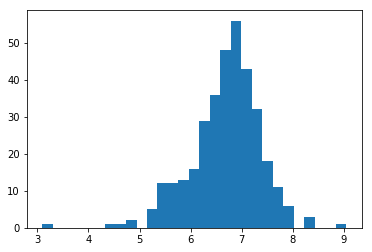

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(qb_10_starts['Y.A'], bins="auto")


In [23]:
qb_10_starts['Y.A'].describe()

count    346.000000
mean       6.700975
std        0.679096
min        3.092251
25%        6.359342
50%        6.778566
75%        7.101500
max        9.048295
Name: Y.A, dtype: float64